In [73]:
# !git clone https://github.com/vponkia/LoanApprovalPrediction.git

In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
import pandas as pd
import numpy as np

In [76]:
df = pd.read_csv('/content/drive/MyDrive/ML/Project/LoanPrediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [78]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [79]:
df.shape

(614, 13)

In [80]:
df = df.drop(['Loan_ID'],axis =1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [81]:
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [82]:
import seaborn as sns

The person who is graduated are more capable to get loan


<Axes: xlabel='Education', ylabel='count'>

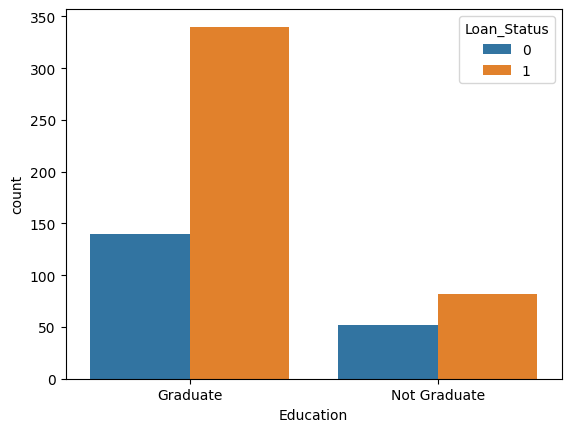

In [83]:
# Education and loan Status
print("The person who is graduated are more capable to get loan")
sns.countplot(x ='Education',hue = 'Loan_Status',data = df)

The married person have more need of loan then unmarried


<Axes: xlabel='Married', ylabel='count'>

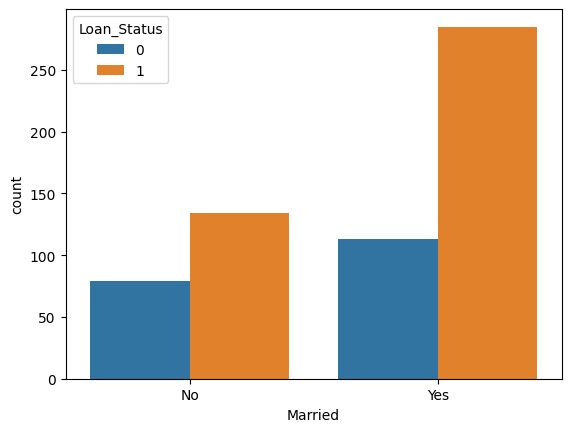

In [84]:
# Marital status  and loan Status
print("The married person have more need of loan then unmarried")
sns.countplot(x ='Married',hue = 'Loan_Status',data = df)

The Self_Employed person have unstable income as compared to employed


<Axes: xlabel='Self_Employed', ylabel='count'>

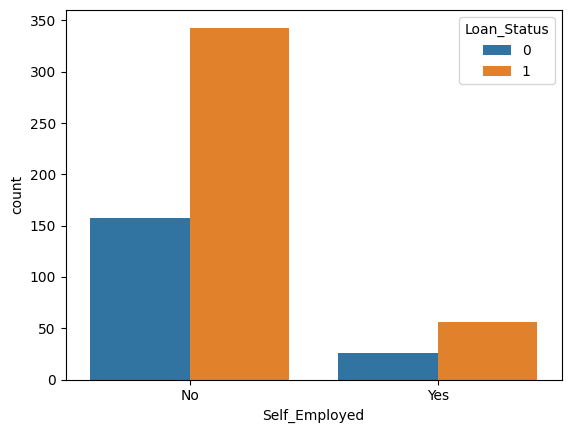

In [85]:
# Self_Employed and loan status
print("The Self_Employed person have unstable income as compared to employed")
sns.countplot(x ='Self_Employed',hue = 'Loan_Status',data = df)

The person who have good credit history are capable to get loan


<Axes: xlabel='Credit_History', ylabel='count'>

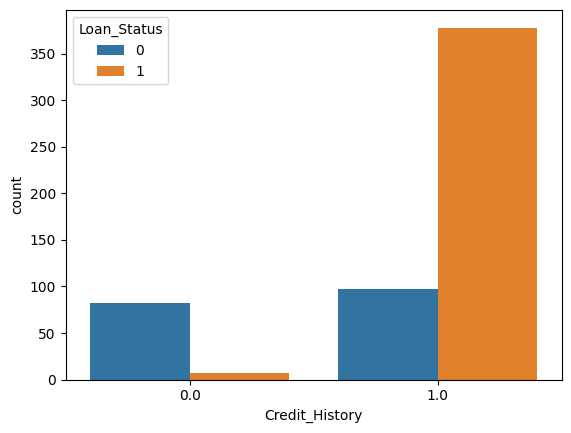

In [86]:
# Credit_History and loan status
print("The person who have good credit history are capable to get loan")
sns.countplot(x ='Credit_History',hue = 'Loan_Status',data = df)

In [87]:
#Cleaning data
#Convert categorical value to numerical value
# df['Married']=df['Married'].replace({'Yes':1,'No':0}).astype(int)
# df['Self_Employed']=df['Self_Employed'].replace({'Yes':1,'No':0}).astype(int)
# df['Gender']=df['Gender'].replace({'Male':1,'Female':0}).astype(int)
# df.head()

In [88]:
# Dependent column values
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [89]:
# replacing the value of 3+ to 4
df = df.replace(to_replace='3+', value=4)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [90]:
# %cd /content/drive/MyDrive/ML/Project/LoanApprovalPrediction

/content/drive/MyDrive/ML/Project/LoanApprovalPrediction


In [91]:
# !git config --global user.name "vponkia"
# !git config --global user.email "ponkiavrushali98@gmail.com"

In [92]:
# !git add ML_Project.ipynb
# !git commit -m "Changes"
# !git push

[main e4c119d] Changes
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite ML_Project.ipynb (93%)
fatal: could not read Username for 'https://github.com': No such device or address
